In [55]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Flatten
from keras.layers import Input
from keras.models import Model

import gym
import matplotlib.pyplot as plt

In [56]:
def plot_state(obs):
    plt.figure(figsize=(12,8))
    plt.imshow(obs)
    plt.axis("off")
    plt.show()

In [57]:
env = gym.make("Breakout-v0")
init = env.reset()

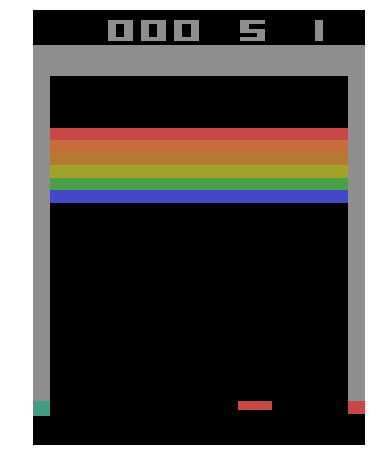

In [58]:
plot_state(init)

In [59]:
env.action_space

Discrete(4)

In [60]:
env.observation_space.shape

(210, 160, 3)

In [61]:
inp = Input(shape=env.observation_space.shape)
x = Flatten()(inp)
x = Dense(516, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(env.action_space.n)(x)

model = Model(inp, output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 210, 160, 3)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100800)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 516)               52013316  
_________________________________________________________________
dense_5 (Dense)              (None, 64)                33088     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 52,046,664
Trainable params: 52,046,664
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
episodes = 2
epsilon = 0.5
gamma = 0.9
done = False

history = {}
history[1] = {"input":[init], "reward":[0], "Q":[]}

In [11]:
observation = init

In [12]:
observation = np.expand_dims(observation,0)

In [13]:
observation.shape

(1, 210, 160, 3)

In [14]:
target = np.array([[1,1,1,1]])

In [15]:
target.shape

(1, 4)

In [24]:
model.evaluate(observation, np.array([[30,30,30,30]]))

1/1 [==============================] - 0s 26ms/step


[6151.67041015625, 6151.67041015625]

In [28]:
model.predict(observation)

array([[-61.314247, -87.928856,   6.509283,  72.536575]], dtype=float32)

Welcome to AI Breakout!
Starting Game 1...
0
True


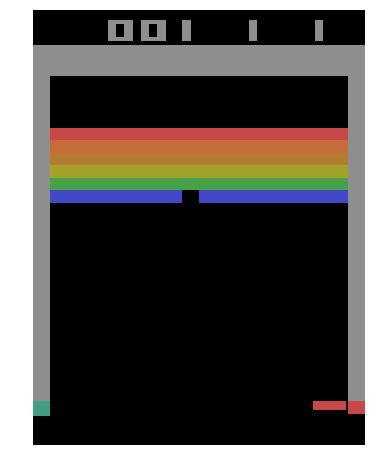

[0.0]


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (210, 160, 3)

In [54]:
for i in range(1, 3):
    print("Welcome to AI Breakout!")
    print("Starting Game {}...".format(i))
    
    game = True
    count=0
    while game:
        
        print(count)
        history[i] = {"input":[], "reward":[], "Q":[]}
         
        if np.random.uniform(0,1):
            action = env.action_space.sample()
        else:
            action = np.argmax(model.predict(observation))
            
        observation, reward, done, info = env.step(action)
        
        history[i]["input"].append(observation)
        history[i]["reward"].append(reward)
        env.render()
        print(done)
        plot_state(observation)
        if done:
            Q = []
            for j,k in enumerate(history[i]["reward"][::-1]):
                if j == 0:
                    Q.append(k)
                else:
                    Q.append(k + gamma*Q[j-1])
            Q = Q[::-1]
            history[i]["Q"] = Q 
            
            game = False
            print(history[i]["Q"])
            model.fit(history[i]["input"], history[i]["Q"], epochs = 1, batch_size=10)
                             
        else:
            pass
            
            